In [1]:
import pandas as pd
import pickle

In [2]:
review = pd.read_csv("IMDB Dataset.csv", encoding="Unicode_escape")

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
review.head(10)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [5]:
review.shape

(50000, 2)

In [6]:
def check(dataframe):
    df=dataframe
    print('About datatypes of columns and memory usage:')
    df.info()
    print('Shape of data frame:')
    print(df.shape)
    for col in df.columns:
        print("Unique number of values in ")
        print(col)
        print(df.loc[:,col].nunique())
    print("number of null values present in each column")
    print(df.isnull().sum())
    print(df.head(3))

In [7]:
check(review)

About datatypes of columns and memory usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
Shape of data frame:
(50000, 2)
Unique number of values in 
review
49582
Unique number of values in 
sentiment
2
number of null values present in each column
review       0
sentiment    0
dtype: int64
                                                                                                                                                                                                                                                                                                                                                                                                                                                                

# Data Preprocessing

In [8]:
import nltk  
from nltk.tokenize import word_tokenize 
import re
import unicodedata
from bs4 import BeautifulSoup

In [9]:
review['length']=review['review'].str.len()

In [10]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
review['review'] = review['review'].apply(lambda x: remove_accented_chars(x))
review['length']=review['review'].str.len()
review.head()

,review,sentiment,length
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive,1761
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive,998
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive,926
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Ra

In [11]:
#Removing html tags
def removehtml(text):
    soup=BeautifulSoup(text)
    return soup.get_text()

review['review']=review['review'].apply(removehtml)
review['length']=review['review'].str.len()
review.head()

,review,sentiment,length
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive,1725
1,"A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive,962
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive,902
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.OK, first of all when you're going to make a film you must Decide if its a thriller 

In [12]:
#converting to lower case
def to_lower_case(text):
    return text.lower()
review['review'] = [to_lower_case(text) for text in review.review]

In [13]:
#removing numbers
import re
def removenumber(text):
    no_number_string = re.sub(r'\d+','',text)
    return no_number_string
review['review'] = [removenumber(text) for text in review.review]
review['length']=review['review'].str.len()
review.head()

,review,sentiment,length
0,"one of the other reviewers has mentioned that after watching just oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. forget pretty pictures painted for mainstream audiences, forget charm, forget romance...oz doesn't mess around. the first episode i ever saw struck me as so nasty it was surreal, i couldn't say i was ready for it, but as i watched more, i developed a taste for oz, and got accustomed to the high levels of graphic violence. not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) watching oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive,1724
1,"a wonderful little production. the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. the actors are extremely well chosen- michael sheen not only ""has got all the polari"" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master's of comedy and his life. the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell's murals decorating every surface) are terribly well done.",positive,962
2,"i thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. the plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). while some may be disappointed when they realize this is not match point : risk addiction, i thought it was proof that woody allen is still fully in control of the style many of us have grown to love.this was the most i'd laughed at one of woody's comedies in years (dare i say a decade?). while i've never been impressed with scarlet johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.this may not be the crown jewel of his career, but it was wittier than ""devil wears prada"" and more interesting than ""superman"" a great comedy to go see with friends.",positive,901
3,"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.ok, first of all when you're going to make a film you must decide if its a thriller or 

In [14]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
 def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    review=''.join(no_punct)
    return review
review['review']=review['review'].apply(lambda x: remove_punctuation(x))
review['length']=review['review'].str.len()
review.head()

,review,sentiment,length
0,one of the other reviewers has mentioned that after watching just oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictures painted for mainstream audiences forget charm forget romanceoz doesnt mess around the first episode i ever saw struck me as so nasty it was surreal i couldnt say i was ready for it but as i watched more i developed a taste for oz and got accustomed to the high levels of graphic violence not just violence but injustice crooked guards wholl be sold out for a nickel inmates wholl kill on order and get away with it well mannered middle class inmates being turned into prison bitches due to their lack of street skills or prison experience watching oz you may become comfortable with what is uncomfortable viewingthats if you can get in touch with your darker side,positive,1664
1,a wonderful little production the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done,positive,936
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point risk addiction i thought it was proof that woody allen is still fully in control of the style many of us have grown to lovethis was the most id laughed at one of woodys comedies in years dare i say a decade while ive never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young womanthis may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman a great comedy to go see with friends,positive,873
3,basically theres a family where a little boy jake thinks theres a zombie in his closet his parents are fighting all the timethis movie is slower than a soap opera and suddenly jake decides to become rambo and kill the zombieok first of all when youre going to make a film you must decide if its a thriller or a drama as a drama the movie is watchable parents are divorcing arguing like in real life and then we have jake with his closet which totally ru

In [16]:
def tokenize(text):
    split=re.split("\W+",text) 
    return split
review['review']=review['review'].apply(lambda x: tokenize(x.lower()))
review.head()

,review,sentiment,length
0,"[one, of, the, other, reviewers, has, mentioned, that, after, watching, just, oz, episode, youll, be, hooked, they, are, right, as, this, is, exactly, what, happened, with, methe, first, thing, that, struck, me, about, oz, was, its, brutality, and, unflinching, scenes, of, violence, which, set, in, right, from, the, word, go, trust, me, this, is, not, a, show, for, the, faint, hearted, or, timid, this, show, pulls, no, punches, with, regards, to, drugs, sex, or, violence, its, is, hardcore, in, the, classic, use, of, the, wordit, is, called, oz, as, that, is, the, nickname, given, to, the, oswald, maximum, security, state, ...]",positive,1664
1,"[a, wonderful, little, production, the, filming, technique, is, very, unassuming, very, oldtimebbc, fashion, and, gives, a, comforting, and, sometimes, discomforting, sense, of, realism, to, the, entire, piece, the, actors, are, extremely, well, chosen, michael, sheen, not, only, has, got, all, the, polari, but, he, has, all, the, voices, down, pat, too, you, can, truly, see, the, seamless, editing, guided, by, the, references, to, williams, diary, entries, not, only, is, it, well, worth, the, watching, but, it, is, a, terrificly, written, and, performed, piece, a, masterful, production, about, one, of, the, great, masters, of, comedy, and, his, life, the, realism, really, ...]",positive,936
2,"[i, thought, this, was, a, wonderful, way, to, spend, time, on, a, too, hot, summer, weekend, sitting, in, the, air, conditioned, theater, and, watching, a, lighthearted, comedy, the, plot, is, simplistic, but, the, dialogue, is, witty, and, the, characters, are, likable, even, the, well, bread, suspected, serial, killer, while, some, may, be, disappointed, when, they, realize, this, is, not, match, point, risk, addiction, i, thought, it, was, proof, that, woody, allen, is, still, fully, in, control, of, the, style, many, of, us, have, grown, to, lovethis, was, the, most, id, laughed, at, one, of, woodys, comedies, in, years, dare, i, ...]",positive,873
3,"[basically, theres, a, family, where, a, little, boy, jake, thinks, theres, a, zombie, in, his, closet, his, parents, are, fighting, all, the, timethis, movie, is, slower, than, a, soap, opera, and, suddenly, jake, decides, to, become, rambo, and, kill, the, zombieok, first, of, all, when, youre, going, to, make, a, film, you, must, decide, if, its, a, thriller, or, a, drama, as, a, drama, the, movie, is, watchable, parents, are, divorcing, arguing, like, in, real, life, and, then, we, have, jake, with, his, closet, which, totally, ruins, all, the, film, i, expected, to, see, a, boogeyman, similar, movie, and, instead, ...]",negative,685
4,"[petter, matteis, love, in, the, time, of, money, is, a, visually, stunning, film, to, watch, mr, mattei, offers, us, a, vivid, portrait, about, human, relations, this, is, a, movie, that, seems, to, be, telling, us, what, money, power, and, success, do, to, people, in, the, different, situations, we, encounter, this, being, a, variation, on, the, arthur, schnitzlers, play, about, the, same, theme, the, director, transfers, the, action, to, the, present, time, new, york, where, all, these, different, characters, meet, and, connect, each, one, is, connected, in, one, way, or, another, to, the, next, person, but, no, one, seems, to, know, ...]",positive,1237


# Removing Stopwords

In [17]:
stopword = nltk.corpus.stopwords.words('english')
print(stopword[:])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
def remove_stops(row):
    my_list = row['review']
    meaningful_words = [w for w in my_list if not w in stopword]
    return (meaningful_words)

review['review'] = review.apply(remove_stops, axis=1)
review.head()

,review,sentiment,length
0,"[one, reviewers, mentioned, watching, oz, episode, youll, hooked, right, exactly, happened, methe, first, thing, struck, oz, brutality, unflinching, scenes, violence, set, right, word, go, trust, show, faint, hearted, timid, show, pulls, punches, regards, drugs, sex, violence, hardcore, classic, use, wordit, called, oz, nickname, given, oswald, maximum, security, state, penitentary, focuses, mainly, emerald, city, experimental, section, prison, cells, glass, fronts, face, inwards, privacy, high, agenda, em, city, home, manyaryans, muslims, gangstas, latinos, christians, italians, irish, moreso, scuffles, death, stares, dodgy, dealings, shady, agreements, never, far, awayi, would, say, main, appeal, show, due, fact, goes, shows, wouldnt, dare, forget, pretty, pictures, painted, ...]",positive,1664
1,"[wonderful, little, production, filming, technique, unassuming, oldtimebbc, fashion, gives, comforting, sometimes, discomforting, sense, realism, entire, piece, actors, extremely, well, chosen, michael, sheen, got, polari, voices, pat, truly, see, seamless, editing, guided, references, williams, diary, entries, well, worth, watching, terrificly, written, performed, piece, masterful, production, one, great, masters, comedy, life, realism, really, comes, home, little, things, fantasy, guard, rather, use, traditional, dream, techniques, remains, solid, disappears, plays, knowledge, senses, particularly, scenes, concerning, orton, halliwell, sets, particularly, flat, halliwells, murals, decorating, every, surface, terribly, well, done]",positive,936
2,"[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater, watching, lighthearted, comedy, plot, simplistic, dialogue, witty, characters, likable, even, well, bread, suspected, serial, killer, may, disappointed, realize, match, point, risk, addiction, thought, proof, woody, allen, still, fully, control, style, many, us, grown, lovethis, id, laughed, one, woodys, comedies, years, dare, say, decade, ive, never, impressed, scarlet, johanson, managed, tone, sexy, image, jumped, right, average, spirited, young, womanthis, may, crown, jewel, career, wittier, devil, wears, prada, interesting, superman, great, comedy, go, see, friends]",positive,873
3,"[basically, theres, family, little, boy, jake, thinks, theres, zombie, closet, parents, fighting, timethis, movie, slower, soap, opera, suddenly, jake, decides, become, rambo, kill, zombieok, first, youre, going, make, film, must, decide, thriller, drama, drama, movie, watchable, parents, divorcing, arguing, like, real, life, jake, closet, totally, ruins, film, expected, see, boogeyman, similar, movie, instead, watched, drama, meaningless, thriller, spots, well, playing, parents, descent, dialogs, shots, jake, ignore]",negative,685
4,"[petter, matteis, love, time, money, visually, stunning, film, watch, mr, mattei, offers, us, vivid, portrait, human, relations, movie, seems, telling, us, money, power, success, people, different, situations, encounter, variation, arthur, schnitzlers, play, theme, director, transfers, action, present, time, new, york, different, characters, meet, connect, one, connected, one, way, another, next, person, one, seems, know, previous, point, contact, stylishly, film, sophisticated, luxurious, look, taken, see, people, live, world, live, habitatthe, thing, one, gets, souls, picture, different, stages, loneliness, one, inhabits, big, city, exactly, best, place, human, relations, find, sincere, fulfillment, one, discerns, case, people, encounterthe, acting, good, mr, matteis, direction, steve, ...]",positive,1237


In [19]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [20]:
def stem_list(row):
    my_list = row['review']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

review['review'] = review.apply(stem_list, axis=1)
review.head()

,review,sentiment,length
0,"[one, review, mention, watch, oz, episod, youll, hook, right, exactli, happen, meth, first, thing, struck, oz, brutal, unflinch, scene, violenc, set, right, word, go, trust, show, faint, heart, timid, show, pull, punch, regard, drug, sex, violenc, hardcor, classic, use, wordit, call, oz, nicknam, given, oswald, maximum, secur, state, penitentari, focus, mainli, emerald, citi, experiment, section, prison, cell, glass, front, face, inward, privaci, high, agenda, em, citi, home, manyaryan, muslim, gangsta, latino, christian, italian, irish, moreso, scuffl, death, stare, dodgi, deal, shadi, agreement, never, far, awayi, would, say, main, appeal, show, due, fact, goe, show, wouldnt, dare, forget, pretti, pictur, paint, ...]",positive,1664
1,"[wonder, littl, product, film, techniqu, unassum, oldtimebbc, fashion, give, comfort, sometim, discomfort, sens, realism, entir, piec, actor, extrem, well, chosen, michael, sheen, got, polari, voic, pat, truli, see, seamless, edit, guid, refer, william, diari, entri, well, worth, watch, terrificli, written, perform, piec, master, product, one, great, master, comedi, life, realism, realli, come, home, littl, thing, fantasi, guard, rather, use, tradit, dream, techniqu, remain, solid, disappear, play, knowledg, sens, particularli, scene, concern, orton, halliwel, set, particularli, flat, halliwel, mural, decor, everi, surfac, terribl, well, done]",positive,936
2,"[thought, wonder, way, spend, time, hot, summer, weekend, sit, air, condit, theater, watch, lightheart, comedi, plot, simplist, dialogu, witti, charact, likabl, even, well, bread, suspect, serial, killer, may, disappoint, realiz, match, point, risk, addict, thought, proof, woodi, allen, still, fulli, control, style, mani, us, grown, lovethi, id, laugh, one, woodi, comedi, year, dare, say, decad, ive, never, impress, scarlet, johanson, manag, tone, sexi, imag, jump, right, averag, spirit, young, womanthi, may, crown, jewel, career, wittier, devil, wear, prada, interest, superman, great, comedi, go, see, friend]",positive,873
3,"[basic, there, famili, littl, boy, jake, think, there, zombi, closet, parent, fight, timethi, movi, slower, soap, opera, suddenli, jake, decid, becom, rambo, kill, zombieok, first, your, go, make, film, must, decid, thriller, drama, drama, movi, watchabl, parent, divorc, argu, like, real, life, jake, closet, total, ruin, film, expect, see, boogeyman, similar, movi, instead, watch, drama, meaningless, thriller, spot, well, play, parent, descent, dialog, shot, jake, ignor]",negative,685
4,"[petter, mattei, love, time, money, visual, stun, film, watch, mr, mattei, offer, us, vivid, portrait, human, relat, movi, seem, tell, us, money, power, success, peopl, differ, situat, encount, variat, arthur, schnitzler, play, theme, director, transfer, action, present, time, new, york, differ, charact, meet, connect, one, connect, one, way, anoth, next, person, one, seem, know, previou, point, contact, stylishli, film, sophist, luxuri, look, taken, see, peopl, live, world, live, habitatth, thing, one, get, soul, pictur, differ, stage, loneli, one, inhabit, big, citi, exactli, best, place, human, relat, find, sincer, fulfil, one, discern, case, peopl, encounterth, act, good, mr, mattei, direct, steve, ...]",positive,1237


In [21]:
def rejoin_words(row):
    my_list = row['review']
    joined_words = ( " ".join(my_list))
    return joined_words

review['review'] = review.apply(rejoin_words, axis=1)
review['length']=review['review'].str.len()
review.head()

,review,sentiment,length
0,one review mention watch oz episod youll hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort viewingthat get touch darker side,positive,1047
1,wonder littl product film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done,positive,566
2,thought wonder way spend time hot summer weekend sit air condit theater watch lightheart comedi plot simplist dialogu witti charact likabl even well bread suspect serial killer may disappoint realiz match point risk addict thought proof woodi allen still fulli control style mani us grown lovethi id laugh one woodi comedi year dare say decad ive never impress scarlet johanson manag tone sexi imag jump right averag spirit young womanthi may crown jewel career wittier devil wear prada interest superman great comedi go see friend,positive,531
3,basic there famili littl boy jake think there zombi closet parent fight timethi movi slower soap opera suddenli jake decid becom rambo kill zombieok first your go make film must decid thriller drama drama movi watchabl parent divorc argu like real life jake closet total ruin film expect see boogeyman similar movi instead watch drama meaningless thriller spot well play parent descent dialog shot jake ignor,negative,408
4,petter mattei love time money visual stun film watch mr mattei offer us vivid portrait human relat movi seem tell us money power success peopl differ situat encount variat arthur schnitzler play theme director transfer action present time new york differ charact meet connect one connect one way anoth next person one seem know previou point contact stylishli film sophist luxuri look taken see peopl live world live habitatth thing one get soul pictur differ stage loneli one inhabit big citi exactli best place human relat find sincer fulfil one discern case peopl encounterth act good mr mattei direct steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talent cast make charact come alivew wish mr mattei good luck await anxious next work,positive,768


In [22]:
def one_letter_word(text):
    tokens = text.split()
    #print(tokens)
    filtered_tokens = [token for token in tokens if len(token)!=1]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
review['review'] = [one_letter_word(text) for text in review.review]
review['length']=review['review'].str.len()
review.head()

,review,sentiment,length
0,one review mention watch oz episod youll hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort viewingthat get touch darker side,positive,1047
1,wonder littl product film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done,positive,566
2,thought wonder way spend time hot summer weekend sit air condit theater watch lightheart comedi plot simplist dialogu witti charact likabl even well bread suspect serial killer may disappoint realiz match point risk addict thought proof woodi allen still fulli control style mani us grown lovethi id laugh one woodi comedi year dare say decad ive never impress scarlet johanson manag tone sexi imag jump right averag spirit young womanthi may crown jewel career wittier devil wear prada interest superman great comedi go see friend,positive,531
3,basic there famili littl boy jake think there zombi closet parent fight timethi movi slower soap opera suddenli jake decid becom rambo kill zombieok first your go make film must decid thriller drama drama movi watchabl parent divorc argu like real life jake closet total ruin film expect see boogeyman similar movi instead watch drama meaningless thriller spot well play parent descent dialog shot jake ignor,negative,408
4,petter mattei love time money visual stun film watch mr mattei offer us vivid portrait human relat movi seem tell us money power success peopl differ situat encount variat arthur schnitzler play theme director transfer action present time new york differ charact meet connect one connect one way anoth next person one seem know previou point contact stylishli film sophist luxuri look taken see peopl live world live habitatth thing one get soul pictur differ stage loneli one inhabit big citi exactli best place human relat find sincer fulfil one discern case peopl encounterth act good mr mattei direct steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talent cast make charact come alivew wish mr mattei good luck await anxious next work,positive,768


In [23]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(review.review)
corpus[:5]

['one', 'review', 'mention', 'watch', 'oz']

In [24]:
from collections import Counter
counter = Counter(corpus)
common = counter.most_common(200000000)

common = pd.DataFrame(common, columns=['corpus', 'count_v'])

common.head(10)

,corpus,count_v
0,movi,99006
1,film,92100
2,one,52671
3,like,43823
4,time,29831
5,good,28916
6,make,28571
7,get,27716
8,see,27574
9,charact,27570


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


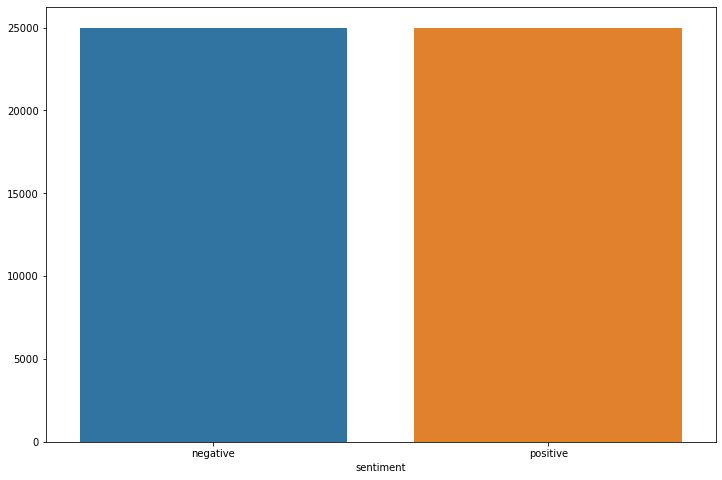

In [26]:
dist = review.groupby(["sentiment"]).size()

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(dist.keys(), dist.values);

# Change the labels for Positive and Negative emotions as 1 and 0 respectively 

In [27]:
review['sentiment'].replace({'negative':0,'positive':1},inplace=True)
review['length']=review['review'].str.len()
review.head()

,review,sentiment,length
0,one review mention watch oz episod youll hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort viewingthat get touch darker side,1,1047
1,wonder littl product film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done,1,566
2,thought wonder way spend time hot summer weekend sit air condit theater watch lightheart comedi plot simplist dialogu witti charact likabl even well bread suspect serial killer may disappoint realiz match point risk addict thought proof woodi allen still fulli control style mani us grown lovethi id laugh one woodi comedi year dare say decad ive never impress scarlet johanson manag tone sexi imag jump right averag spirit young womanthi may crown jewel career wittier devil wear prada interest superman great comedi go see friend,1,531
3,basic there famili littl boy jake think there zombi closet parent fight timethi movi slower soap opera suddenli jake decid becom rambo kill zombieok first your go make film must decid thriller drama drama movi watchabl parent divorc argu like real life jake closet total ruin film expect see boogeyman similar movi instead watch drama meaningless thriller spot well play parent descent dialog shot jake ignor,0,408
4,petter mattei love time money visual stun film watch mr mattei offer us vivid portrait human relat movi seem tell us money power success peopl differ situat encount variat arthur schnitzler play theme director transfer action present time new york differ charact meet connect one connect one way anoth next person one seem know previou point contact stylishli film sophist luxuri look taken see peopl live world live habitatth thing one get soul pictur differ stage loneli one inhabit big citi exactli best place human relat find sincer fulfil one discern case peopl encounterth act good mr mattei direct steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talent cast make charact come alivew wish mr mattei good luck await anxious next work,1,768


# Represent text as numerical data using TF-IDF Vectorizer and get the document term frequency matrix

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
comment=review['review']
tfidf=TfidfVectorizer(max_df=0.5, ngram_range=(1,2), max_features = 200000)
comment=tfidf.fit_transform(comment)

In [30]:
sentiment=review['sentiment']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#  Define the feature set (independent variable or X) to be review column and sentiment as target (or dependent variable) and divide into train and test datasets

In [32]:
xtrain,xtest,ytrain,ytest=train_test_split(comment,sentiment,test_size=0.3,random_state=5)

# Predicting Using Logistic Regression

In [33]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
p=lr.predict(xtest)

In [34]:
print('Accuracy score', accuracy_score(p,ytest))
print('-----------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p,ytest))
print('-----------------------------------------')
print('Classification Report')
print(classification_report(p,ytest))

Accuracy score 0.8958666666666667
-----------------------------------------
Confusion Matrix
[[6494  681]
 [ 881 6944]]
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      7175
           1       0.91      0.89      0.90      7825

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



# Predicting Using Naive Bayes

In [35]:
nb=MultinomialNB()
nb.fit(xtrain,ytrain)
p=nb.predict(xtest)

In [36]:

print('Accuracy score', accuracy_score(p,ytest))
print('-----------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p,ytest))
print('-----------------------------------------')
print('Classification Report')
print(classification_report(p,ytest))

Accuracy score 0.8863333333333333
-----------------------------------------
Confusion Matrix
[[6568  898]
 [ 807 6727]]
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7466
           1       0.88      0.89      0.89      7534

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



In [39]:
pickle.dump(lr, open('Final_IMDB (2).pkl', 'wb'))

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(review['review'],sentiment,test_size=0.3,random_state=5)

# Finding Best Parameters For Classification

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer

pipeline = Pipeline([
           ('vect', TfidfVectorizer()),
           ('lr', LogisticRegression()),
])
parameters = {
'vect__max_df': (0.5, 0.75),
'vect__ngram_range': ((1, 1), (1, 2))
}

grid_search = GridSearchCV(pipeline, parameters, cv=5)
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('lr', LogisticRegression())]),
             param_grid={'vect__max_df': (0.5, 0.75),
                         'vect__ngram_range': ((1, 1), (1, 2))})

In [39]:
grid_search.best_params_

{'vect__max_df': 0.5, 'vect__ngram_range': (1, 1)}

In [40]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
           ('vect', TfidfVectorizer(max_df=0.5, ngram_range=(1,2), max_features = 200000)),
           ('lr', LogisticRegression()),
])
pipeline.fit(xtrain, ytrain)

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.5, max_features=200000,
                                 ngram_range=(1, 2))),
                ('lr', LogisticRegression())])

In [41]:
print(accuracy_score(ytest, pipeline.predict(xtest)))

0.8955333333333333


In [42]:
#naive bayes
pipeline = Pipeline([
           ('tfidf', TfidfVectorizer(max_df=0.5, ngram_range=(1,2), max_features = 200000)),
           ('bn', MultinomialNB()),
])
pipeline.fit(xtrain, ytrain)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.5, max_features=200000,
                                 ngram_range=(1, 2))),
                ('bn', MultinomialNB())])

In [43]:
print(accuracy_score(ytest, pipeline.predict(xtest)))

0.8838666666666667
